# Decision Tree

In [36]:
import pandas as pd
df=pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [38]:
inputs=df.drop("salary_more_then_100k",axis='columns')
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [40]:
target=df['salary_more_then_100k']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

# Importing lab encoder for convertng in columns into numbers 

In [42]:
# Initializing 
from sklearn.preprocessing import LabelEncoder
a = LabelEncoder()
b = LabelEncoder()
c = LabelEncoder()

In [44]:
# creating a new column

inputs['new_Company']=a.fit_transform(inputs['company'])
inputs['new_job']=b.fit_transform(inputs['job'])
inputs['new_degree']=c.fit_transform(inputs['degree'])


In [46]:
inputs

,company,job,degree,new_Company,new_job,new_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
# now it is converted to numbers so drop the named field 

In [50]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n.head()

,new_Company,new_job,new_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [52]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [54]:
# Time to implement machine learnng model
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [56]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [58]:
model.score(inputs_n,target)


1.0

In [62]:
import warnings
warnings.filterwarnings('ignore')
model.predict([[2,1,0]])
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

array([0], dtype=int64)

In [64]:
# Is salary of Google, Computer Engineer, Masters degree > 100 k ?
model.predict([[2,1,1]])


array([1], dtype=int64)

[Text(0.4, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2, 0.75, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.30000000000000004, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.5833333333333334, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.4166666666666667, 'x[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.7, 0.

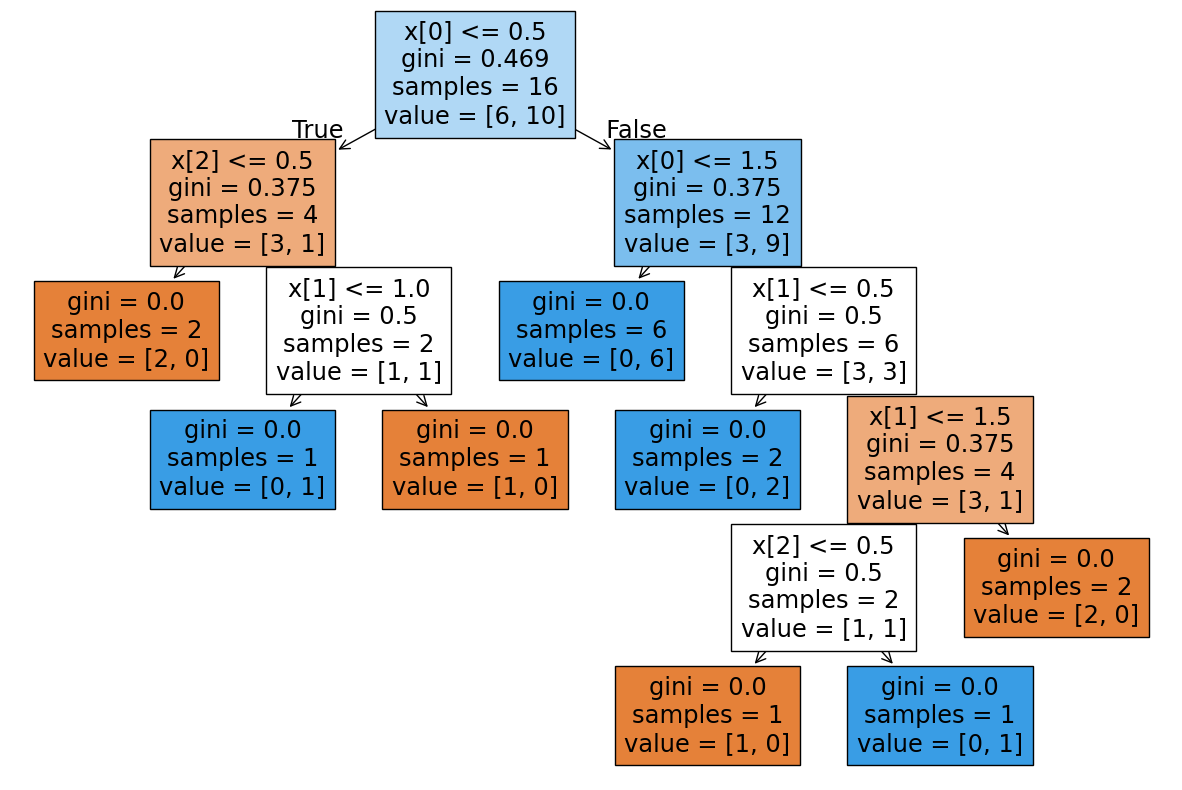

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)